Clasificación de imágenes con redes neuronales convolucionales (CNN)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Redimensionar a 28x28x1 (formato CNN) y normalizar
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Codificación one-hot para etiquetas
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\POLVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8995 - loss: 0.3486 - val_accuracy: 0.9827 - val_loss: 0.0641
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9807 - loss: 0.0604 - val_accuracy: 0.9835 - val_loss: 0.0597
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9875 - loss: 0.0391 - val_accuracy: 0.9875 - val_loss: 0.0464
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9923 - loss: 0.0243 - val_accuracy: 0.9877 - val_loss: 0.0474
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9945 - loss: 0.0174 - val_accuracy: 0.9870 - val_loss: 0.0600


In [5]:
loss, acc = model.evaluate(x_test, y_test_cat)
print(f"\nPrecisión en datos de prueba: {acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9803 - loss: 0.0691

Precisión en datos de prueba: 0.99


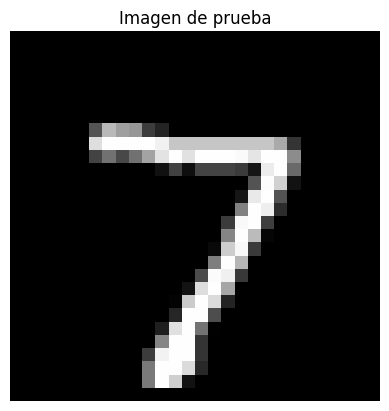

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicción: 7
Etiqueta real: 7


In [6]:
imagen = x_test[0]
plt.imshow(imagen.squeeze(), cmap='gray')
plt.title('Imagen de prueba')
plt.axis('off')
plt.show()

# Predicción
pred = model.predict(np.array([imagen]))
print("Predicción:", np.argmax(pred))
print("Etiqueta real:", y_test[0])
